In [4]:
import pandas as pd
import numpy as np
import sklearn

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784') 
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [6]:
len(mnist['data'])

70000

In [7]:
X,y = mnist['data'], mnist['target']

In [8]:
X.shape

(70000, 784)

In [9]:
type(X)

numpy.ndarray

In [10]:
type(y)

numpy.ndarray

In [11]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [12]:
y = y.astype("float")

In [13]:
y==0

array([False,  True, False, ..., False, False, False])

In [14]:
X[69999]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   8., 117., 254., 220.,
        89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        13.,  95., 212., 253., 253., 253., 157.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  16.,  95., 209., 253., 253., 253., 245.,
       125.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [15]:
y[69999]

6.0

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
def viz(n):
    plt.imshow(X[n].reshape(28,28))
    return

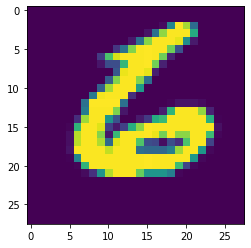

In [17]:
viz(69999)

In [18]:
y[1000]

0.0

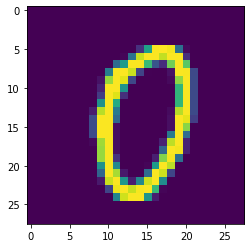

In [19]:
viz(1000)

In [20]:
y == 4

array([False, False,  True, ...,  True, False, False])

In [21]:
np.where(y==4)

(array([    2,     9,    20, ..., 69977, 69987, 69997]),)

In [22]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

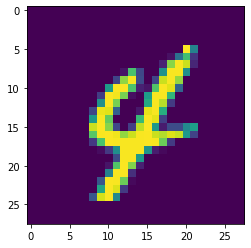

In [23]:
viz(69977)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,shuffle=True, random_state = 42)

In [26]:
y_train

array([5., 4., 8., ..., 1., 0., 0.])

In [27]:
#Binary classifier - converting the digits to zero and non-zero
y_train_0 = (y_train == 0)
y_train_0

array([False, False, False, ..., False,  True,  True])

In [28]:
y_test_0 = (y_test==0)
y_test_0

array([False, False, False, ..., False, False, False])

In [29]:
y_train[-5:]

array([6., 6., 1., 0., 0.])

In [30]:
y_test[-5:]

array([3., 5., 2., 7., 1.])

In [31]:
#Using Stochastic Gradient Descent classifier
from sklearn.linear_model import SGDClassifier

In [32]:
clf = SGDClassifier(random_state = 0)

In [33]:
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

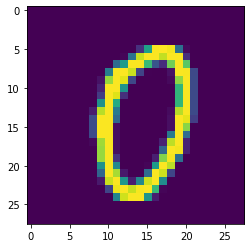

In [34]:
viz(1000)

In [35]:
clf.predict(X[1000].reshape(1,-1))

array([ True])

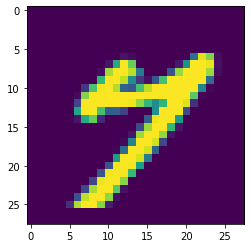

In [36]:
viz(1001)

In [37]:
clf.predict(X[1001].reshape(1,-1))

array([False])

In [38]:
#Stratifiedkfold cross validatiopn
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf2 = SGDClassifier(random_state = 0)

In [39]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 100)

In [40]:
#Since we have divided our data into 3 groups, we will loop over the data thrice
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clf_clone = clone(clf2) # cloning the model
    X_train_fold = X_train[train_index] # finding training and test fold in each iteration
    X_test_fold = X_train[test_index]
    y_train_fold = (y_train_0[train_index])
    y_test_fold = (y_train_0[test_index])
    
    clf_clone.fit(X_train_fold, y_train_fold) # fitting the model in each iteration
    y_pred = clf_clone.predict(X_test_fold) # predicting in each iteration
    num_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(num_correct/len(y_pred))) 
    

0.9829
0.9876
0.9877


In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val_score(clf2, X_train, y_train_0, cv= 3, scoring = 'accuracy')

array([0.98285837, 0.98757098, 0.9877317 ])

In [43]:
cross_val_score(clf2, X_train, y_train_0, cv= 10, scoring = 'accuracy')

array([0.98660714, 0.98821429, 0.9875    , 0.99017857, 0.98964286,
       0.98160714, 0.98857143, 0.98785714, 0.96071429, 0.98910714])

In [44]:
# since accuracy is not a good efficiency measure for skewed data, we will look at the confusion matrix
from sklearn.model_selection import cross_val_predict

In [45]:
y_train_pred = cross_val_predict(clf2, X_train, y_train_0,cv=3)

In [70]:
y_train_pred

array([False, False, False, ..., False,  True,  True])

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_train_0, y_train_pred)

array([[50030,   410],
       [  371,  5189]])

In [48]:
y_test_pred = cross_val_predict(clf2, X_test, y_test_0, cv=3)

In [69]:
y_test_pred

array([False, False, False, ..., False, False, False])

In [49]:
confusion_matrix(y_test_0, y_test_pred)

array([[12526,   131],
       [   72,  1271]])

In [50]:
#Let's draw the precision recall curve to visualize the performance of our model
from sklearn.metrics import precision_recall_curve

In [97]:
#finding out the probabilities of the classes using decision_function
y_train_pred_prob = cross_val_predict(clf2, X_train, y_train_0,cv=3, method='decision_function')
print(y_train_0)
print(y_train_pred_prob)

[False False False ... False  True  True]
[ -23748.05117939  -51567.68763487 -106947.06442501 ...  -98603.76944888
   47400.53563155   39314.21098766]


In [105]:
Precisions, Recalls, Thresholds = precision_recall_curve(y_train_0, y_train_pred_prob)

In [106]:
Recalls

array([1.00000000e+00, 9.99820144e-01, 9.99820144e-01, ...,
       3.59712230e-04, 1.79856115e-04, 0.00000000e+00])

In [107]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
        plt.plot(thresholds, precisions[:-1], "-", label='Precision', color= 'blue')
        plt.plot(thresholds, recalls[:-1], "-", label='Recall', color= 'green')
        plt.xlabel("Threshold")
        plt.legend(loc="upper left")
        plt.ylim([-0.5,1.5])

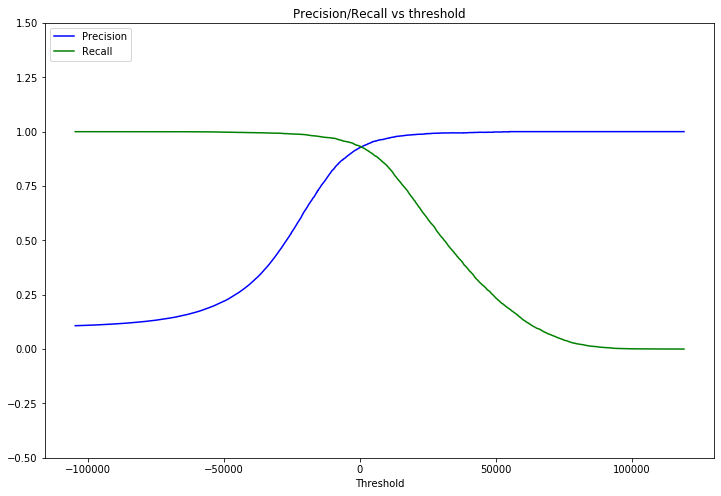

In [112]:
plt.figure(figsize=(12,8))
plot_precision_recall_vs_threshold(Precisions, Recalls, Thresholds)
plt.title("Precision/Recall vs threshold")
plt.show()

In [109]:
len(Precisions)

51695

In [110]:
len(Recalls)

51695

Text(0, 0.5, 'Precisions')

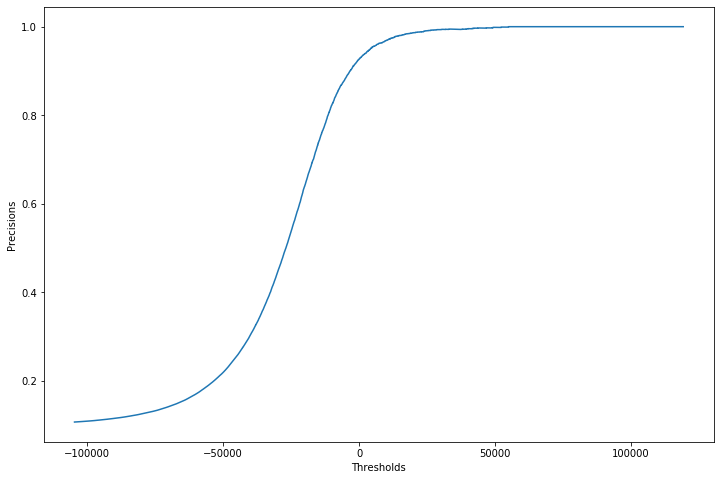

In [114]:
plt.figure(figsize=(12,8))
plt.plot(Thresholds, Precisions[1:])
plt.xlabel("Thresholds")
plt.ylabel("Precisions")

In [115]:
#index where the precisions is < 90%
idx = len(Precisions[Precisions<0.9])

In [116]:
Thresholds[idx]

-3329.4709342930373

In [117]:
y_train_pred_90 = y_train_pred_prob>Thresholds[idx]

In [120]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0,y_train_pred_90)

0.9002217294900222

In [121]:
recall_score(y_train_0,y_train_pred_90)

0.9492805755395683

In [122]:
#ROC curve - Recall vs False positive rate
from sklearn.metrics import roc_curve

In [123]:
fpr, tpr, threshold = roc_curve(y_train_0, y_train_pred_prob)

In [131]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")

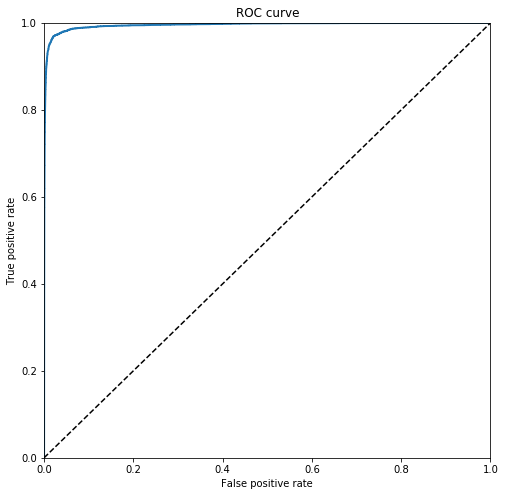

In [133]:
plt.figure(figsize=(8,8))
plot_roc_curve(fpr, tpr)
plt.show()

In [134]:
from sklearn.metrics import roc_auc_score

In [136]:
roc_auc_score(y_train_0, y_train_pred_prob)

0.9948734196623668

In [ ]:
# use PR when positive class is rare or when we care more about false positives than false negatives
# use ROC when negative class is rare or when we care more about false negatives than false positives

In [138]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [139]:
f_clf = RandomForestClassifier(random_state=0,n_estimators=100)

In [140]:
y_prob_forest = cross_val_predict(f_clf, X_train, y_train_0, cv=3, method='predict_proba')

In [141]:
y_prob_forest

array([[0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.36, 0.64]])

In [146]:
y_forest_score = y_prob_forest[:,1]
y_forest_score

array([0.02, 0.01, 0.  , ..., 0.  , 1.  , 0.64])

In [147]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0,y_forest_score)

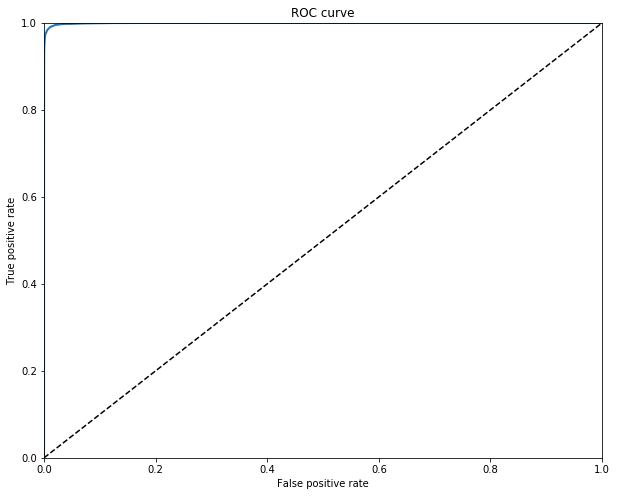

In [148]:
plt.figure(figsize=(10,8))
plot_roc_curve(fpr_forest, tpr_forest,"Random Forests")

In [149]:
roc_auc_score(y_train_0,y_forest_score)

0.9994785955533749

In [151]:
y_train_pred_rf = cross_val_predict(f_clf, X_train, y_train_0,cv=3)

In [152]:
precision_score(y_train_0, y_train_pred_rf)

0.9934198157548412

In [153]:
recall_score(y_train_0, y_train_pred_rf)

0.9503597122302159

In [154]:
confusion_matrix(y_train_0, y_train_pred_rf)

array([[50405,    35],
       [  276,  5284]])